# Folder Growth Analysis

This notebook analyzes the growth of the folder structure generated by `FolderGenerator`.

## The Math Behind It

The script creates folders recursively. For a given Width ($W$) and Depth ($D$):

- **Level 1**: $W$ folders are created.
- **Level 2**: For each folder in Level 1, $W$ new folders are created ($W \times W = W^2$).
- **Level 3**: $W \times W^2 = W^3$ folders.
- ...
- **Level $k$**: $W^k$ folders.

The **Total Number of Folders** ($N$) is the sum of folders at all levels up to depth $D$:

$$ N = \sum_{k=1}^{D} W^k = W^1 + W^2 + ... + W^D $$

This is a **Geometric Series**.

If $W = 1$, the growth is linear: $N = D$.

If $W > 1$, the growth is exponential: 
$$ N = \frac{W(W^D - 1)}{W - 1} $$


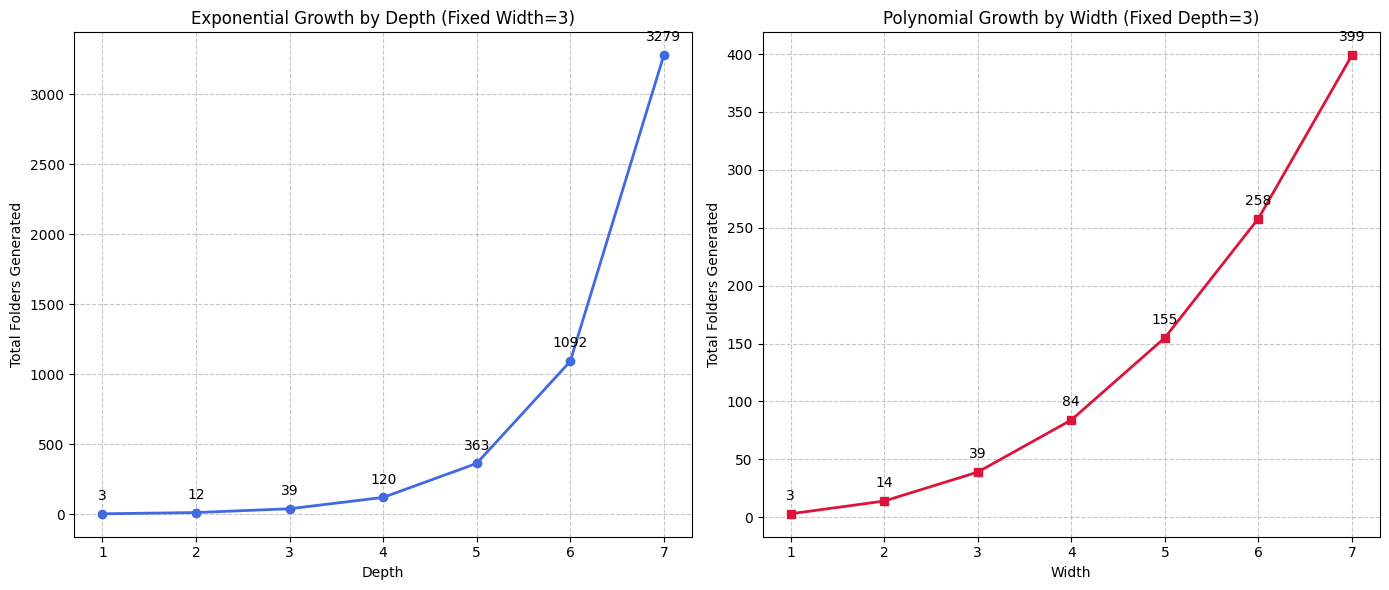

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_total_folders(depth, width):
    """Calculates total folders generated for given depth and width."""
    if width == 1:
        return depth
    # Using the geometric series formula for integer result
    return (width * (width ** depth - 1)) // (width - 1)

# --- Visualization 1: Growth by Depth ---
# Fix Width at 3, see how Depth affects total folders
fixed_width = 3
depths = list(range(1, 8))  # Depth 1 to 7
totals_by_depth = [calculate_total_folders(d, fixed_width) for d in depths]

# --- Visualization 2: Growth by Width ---
# Fix Depth at 3, see how Width affects total folders
fixed_depth = 3
widths = list(range(1, 8))  # Width 1 to 7
totals_by_width = [calculate_total_folders(fixed_depth, w) for w in widths]

# Plotting
plt.figure(figsize=(14, 6))

# Plot 1
plt.subplot(1, 2, 1)
plt.plot(depths, totals_by_depth, marker='o', color='royalblue', linewidth=2)
plt.title(f'Exponential Growth by Depth (Fixed Width={fixed_width})')
plt.xlabel('Depth')
plt.ylabel('Total Folders Generated')
plt.grid(True, linestyle='--', alpha=0.7)
for i, txt in enumerate(totals_by_depth):
    plt.annotate(txt, (depths[i], totals_by_depth[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(widths, totals_by_width, marker='s', color='crimson', linewidth=2)
plt.title(f'Polynomial Growth by Width (Fixed Depth={fixed_depth})')
plt.xlabel('Width')
plt.ylabel('Total Folders Generated')
plt.grid(True, linestyle='--', alpha=0.7)
for i, txt in enumerate(totals_by_width):
    plt.annotate(txt, (widths[i], totals_by_width[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

## Observation

As you can see from the charts:
1. **Depth** causes massive exponential growth. Increasing depth by just 1 multiplies the total count by `Width`.
2. That is why we added the Safety Limits ($5 \times 5$) in the code!

Example: Width 10, Depth 10 would generate:
$$ \frac{10(10^{10} - 1)}{9} \approx 11,111,111,110 \text{ folders!} $$